In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
! pip3 install squarify
import squarify
import matplotlib.colors as colors
BASE = "/media/giani/Gianicosas/Magister/Proyecto/"
import matplotlib.patheffects as pe

# ANÁLISIS DE DESERTORES DE IP/CFT POR TIPO DE ESTABLECIMIENTO EDUCACIONAL Y ENSEÑANZA

## LECTURA DE DATOS

In [1682]:
# MODALIDAD DE COLEGIO
# TIPO DE ESTABLECIMIENTO

In [2]:
cols = [ 'mrun','cat_periodo', 'codigo_unico', 
       'anio_ing_carr_ori','fec_nac_alu', 'region_sede',
       'tipo_inst_1', 'dependencia_colegio','tipo_ensenanza_colegio','desertor_1']

In [5]:
df = pd.read_csv(f"{BASE}work_data/matriz_desercion_1.csv.gz", usecols=cols)
df

/tmp/ipykernel_14424/777324217.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"{BASE}work_data/matriz_desercion_1.csv.gz", usecols=cols)


,cat_periodo,codigo_unico,mrun,fec_nac_alu,anio_ing_carr_ori,tipo_inst_1,region_sede,desertor_1,tipo_ensenanza_colegio,dependencia_colegio
0,2015,I498S6C132J2V1,37.0,197808,2015,Centros de Formación Técnica,Biobío,0.0,NaN,NaN
1,2015,I111S14C309J2V1,118.0,199102,2015,Institutos Profesionales,Metropolitana,0.0,310.0,3.0
2,2015,I106S3C64J4V1,253.0,198404,2015,Institutos Profesionales,Metropolitana,1.0,NaN,NaN
3,2015,I221S1C57J1V1,370.0,198910,2015,Centros de Formación Técnica,Metropolitana,1.0,310.0,3.0
4,2015,I176S8C59J2V1,533.0,198309,2015,Institutos Profesionales,Coquimbo,0.0,510.0,2.0
...,...,...,...,...,...,...,...,...,...,...
2746649,2021,I106S6C295J4V1,26380151.0,199603,2020,Institutos Profesionales,Metropolitana,0.0,NaN,NaN
2746650,2021,I260S44C120J1V1,26380152.0,200302,2021,Centros de Formación Técnica,Magallanes,1.0,NaN,NaN
2746651,2021,I152S10C341J4V1,26453499.0,199208,2021,Institutos Profesionales,Metropolitana,1.0,NaN,NaN
2746652,2021,I152S10C349J4V1,26453942.0,196501,2020,Institutos Profesionales,Metropolitana,0.0,NaN,NaN


In [6]:
df = df.drop_duplicates(subset='mrun')

In [7]:
import datetime
# pasar int a tipo fecha
int2date = lambda x: datetime.date(x//100, x-100*(x//100), 1)

#calcular edad
def edad(df):
    anio_ing_carr_ori = df["anio_ing_carr_ori"]
    fec_nac = df["fec_nac_alu"]
    
    return datetime.date(anio_ing_carr_ori,1,1).year - int2date(fec_nac).year \
                        - (datetime.date(anio_ing_carr_ori,1,1).month < int2date(fec_nac).month)

df["edad"] = df.apply(lambda row: edad(row), axis=1)

df.head()

/tmp/ipykernel_14424/3933535406.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["edad"] = df.apply(lambda row: edad(row), axis=1)


,cat_periodo,codigo_unico,mrun,fec_nac_alu,anio_ing_carr_ori,tipo_inst_1,region_sede,desertor_1,tipo_ensenanza_colegio,dependencia_colegio,edad
0,2015,I498S6C132J2V1,37.0,197808,2015,Centros de Formación Técnica,Biobío,0.0,NaN,NaN,36
1,2015,I111S14C309J2V1,118.0,199102,2015,Institutos Profesionales,Metropolitana,0.0,310.0,3.0,23
2,2015,I106S3C64J4V1,253.0,198404,2015,Institutos Profesionales,Metropolitana,1.0,NaN,NaN,30
3,2015,I221S1C57J1V1,370.0,198910,2015,Centros de Formación Técnica,Metropolitana,1.0,310.0,3.0,25
4,2015,I176S8C59J2V1,533.0,198309,2015,Institutos Profesionales,Coquimbo,0.0,510.0,2.0,31


In [8]:
df2 = df.copy()

In [9]:
(df.isna().sum()/df.shape[0]).sort_values()#.plot.barh(figsize=(10, 5))

cat_periodo               0.000000
codigo_unico              0.000000
mrun                      0.000000
fec_nac_alu               0.000000
anio_ing_carr_ori         0.000000
tipo_inst_1               0.000000
region_sede               0.000000
desertor_1                0.000000
edad                      0.000000
tipo_ensenanza_colegio    0.138775
dependencia_colegio       0.141937
dtype: float64

<AxesSubplot:>

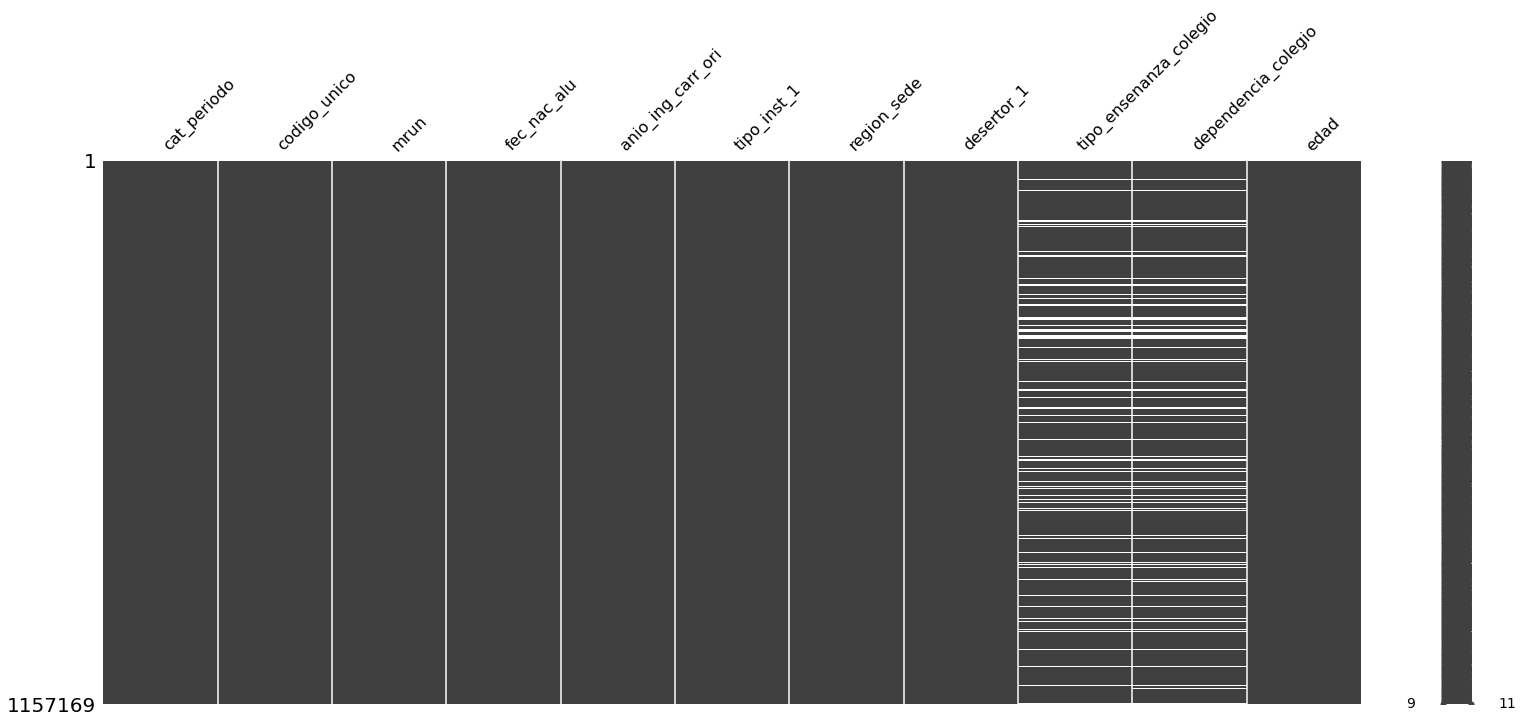

In [10]:
! pip3 install missingno
import missingno as msno
msno.matrix(df)

In [11]:
df['dependencia_colegio'].unique()

array([nan, 3.0, 2.0, 5.0, 1.0, 4.0, 6.0, '2', '3', '4', '5', '1',
       'LOS ANDES', 'SANTIAGO ORIENTE', 'VALPARAISO', 'SANTIAGO PONIENTE',
       'COLCHAGUA', '6', 'VALPARAÍSO', 'CAUTÍN NORTE',
       'ANTOFAGASTA - TOCOPILLA'], dtype=object)

In [12]:
l = ['LOS ANDES', 'SANTIAGO ORIENTE', 'VALPARAISO',
       'SANTIAGO PONIENTE', 'COLCHAGUA', 'VALPARAÍSO', 'CAUTÍN NORTE',
       'ANTOFAGASTA - TOCOPILLA']
mask = df['dependencia_colegio'].isin(l)
df[mask]

,cat_periodo,codigo_unico,mrun,fec_nac_alu,anio_ing_carr_ori,tipo_inst_1,region_sede,desertor_1,tipo_ensenanza_colegio,dependencia_colegio,edad
883804,2018,I430S10C135J1V1,178576.0,199904,2018,Centros de Formación Técnica,Metropolitana,0.0,510.0,LOS ANDES,18
886058,2018,I183S1C1J2V1,305852.0,199901,2018,Institutos Profesionales,Metropolitana,0.0,310.0,SANTIAGO ORIENTE,19
886897,2018,I111S4C62J1V1,356607.0,199902,2018,Institutos Profesionales,Valparaíso,0.0,310.0,VALPARAISO,18
895783,2018,I143S21C100J1V1,867000.0,199909,2018,Institutos Profesionales,Valparaíso,1.0,310.0,LOS ANDES,18
898130,2018,I143S21C619J2V1,999109.0,199908,2018,Institutos Profesionales,Valparaíso,0.0,510.0,LOS ANDES,18
...,...,...,...,...,...,...,...,...,...,...,...
2718728,2021,I143S8C100J1V1,23958414.0,200112,2021,Institutos Profesionales,Lib. Gral B. O'Higgins,0.0,310.0,COLCHAGUA,19
2726743,2021,I111S2C429J1V1,24372742.0,200003,2021,Institutos Profesionales,Valparaíso,0.0,310.0,VALPARAISO,20
2732732,2021,I908S1C2J2V1,24687177.0,199405,2021,Centros de Formación Técnica,Antofagasta,1.0,363.0,ANTOFAGASTA - TOCOPILLA,26
2738962,2021,I218S1C10J1V2,25463098.0,200104,2021,Centros de Formación Técnica,Metropolitana,0.0,410.0,SANTIAGO PONIENTE,19


In [13]:
l = ['LOS ANDES', 'SANTIAGO ORIENTE', 'VALPARAISO',
       'SANTIAGO PONIENTE', 'COLCHAGUA', 'VALPARAÍSO', 'CAUTÍN NORTE',
       'ANTOFAGASTA - TOCOPILLA']
mask = ~df['dependencia_colegio'].isin(l)
df = df[mask]
#df[mask].shape

In [14]:
df['dependencia_colegio'] = df['dependencia_colegio'].apply(lambda x: int(x) if x==x else -1)

In [15]:
df['tipo_ensenanza_colegio'].unique()

array([ nan, 310., 510., 410., 610., 363., 563., 361., 360., 710., 810.,
       663., 463., 661., 460., 763., 461., 660., 910., 560., 561., 761.,
       863., 760.])

In [16]:
tipo_ensenanza_colegio = {  0: "No Aplica",
                           10: "Educación Parvularia",
                          110: "Educación Básica",
                          160: "Educación Básica Común Adultos",
                          161: "Educación Básica Especial Adultos",
                          163: "Escuelas Cárceles",
                          165: "Educación Básica Adultos Sin Oficios",
                          167: "Educación Básica Adultos Con Oficios",
                          211: "Educación Especial",
                          212: "Educación Especial",
                          213: "Educación Especial",
                          214: "Educación Especial",
                          215: "Educación Especial",
                          216: "Educación Especial",
                          217: "Educación Especial",
                          299: "Opción 4 Programa Integración Escolar",
                          310: "Educación Media H-C",
                          360: "Educación Media H-C Adultos",
                          361: "Educación Media H-C Adultos",
                          362: "Escuelas Cárceles",
                          363: "Educación Media H-C Adultos",
                          410: "Educación Media T-P Comercial",
                          460: "Educación Media T-P Comercial Adultos",
                          461: "Educación Media T-P Comercial Adultos",
                          463: "Educación Media T-P Comercial Adultos",
                          510: "Educación Media T-P Industrial",
                          560: "Educación Media T-P Industrial Adultos",
                          561: "Educación Media T-P Industrial Adultos",
                          563: "Educación Media T-P Industrial Adultos",
                          610: "Educación Media T-P Técnica",
                          660: "Educación Media T-P Técnica Adultos",
                          661: "Educación Media T-P Técnica Adultos",
                          663: "Educación Media T-P Técnica Adultos",
                          710: "Educación Media T-P Agrícola",
                          760: "Educación Media T-P Agrícola Adultos",
                          761: "Educación Media T-P Agrícola Adultos",
                          763: "Educación Media T-P Agrícola Adultos",
                          810: "Educación Media T-P Marítima",
                          860: "Educación Media T-P Marítima Adultos",
                          863: "Educación Media T-P Marítima Adultos",
                          910: "Educación Media Artística",
                          963: "Educación Media Artística Adultos"
                         }

In [17]:
df = df.replace({'tipo_ensenanza_colegio': tipo_ensenanza_colegio})
df

,cat_periodo,codigo_unico,mrun,fec_nac_alu,anio_ing_carr_ori,tipo_inst_1,region_sede,desertor_1,tipo_ensenanza_colegio,dependencia_colegio,edad
0,2015,I498S6C132J2V1,37.0,197808,2015,Centros de Formación Técnica,Biobío,0.0,NaN,-1,36
1,2015,I111S14C309J2V1,118.0,199102,2015,Institutos Profesionales,Metropolitana,0.0,Educación Media H-C,3,23
2,2015,I106S3C64J4V1,253.0,198404,2015,Institutos Profesionales,Metropolitana,1.0,NaN,-1,30
3,2015,I221S1C57J1V1,370.0,198910,2015,Centros de Formación Técnica,Metropolitana,1.0,Educación Media H-C,3,25
4,2015,I176S8C59J2V1,533.0,198309,2015,Institutos Profesionales,Coquimbo,0.0,Educación Media T-P Industrial,2,31
...,...,...,...,...,...,...,...,...,...,...,...
2746649,2021,I106S6C295J4V1,26380151.0,199603,2020,Institutos Profesionales,Metropolitana,0.0,NaN,-1,23
2746650,2021,I260S44C120J1V1,26380152.0,200302,2021,Centros de Formación Técnica,Magallanes,1.0,NaN,-1,17
2746651,2021,I152S10C341J4V1,26453499.0,199208,2021,Institutos Profesionales,Metropolitana,1.0,NaN,-1,28
2746652,2021,I152S10C349J4V1,26453942.0,196501,2020,Institutos Profesionales,Metropolitana,0.0,NaN,-1,55


In [18]:
dependencia_colegio = {1: 'Corporación Municipal',
                       2: 'Municipal DAEM',
                       3: 'Particular Subvencionado',
                       4: 'Particular Pagado',
                       5: 'Administración Delegada',
                       6: 'Servicio Local de Educación'}

In [19]:
df = df.replace({'dependencia_colegio': dependencia_colegio})
df

,cat_periodo,codigo_unico,mrun,fec_nac_alu,anio_ing_carr_ori,tipo_inst_1,region_sede,desertor_1,tipo_ensenanza_colegio,dependencia_colegio,edad
0,2015,I498S6C132J2V1,37.0,197808,2015,Centros de Formación Técnica,Biobío,0.0,NaN,-1,36
1,2015,I111S14C309J2V1,118.0,199102,2015,Institutos Profesionales,Metropolitana,0.0,Educación Media H-C,Particular Subvencionado,23
2,2015,I106S3C64J4V1,253.0,198404,2015,Institutos Profesionales,Metropolitana,1.0,NaN,-1,30
3,2015,I221S1C57J1V1,370.0,198910,2015,Centros de Formación Técnica,Metropolitana,1.0,Educación Media H-C,Particular Subvencionado,25
4,2015,I176S8C59J2V1,533.0,198309,2015,Institutos Profesionales,Coquimbo,0.0,Educación Media T-P Industrial,Municipal DAEM,31
...,...,...,...,...,...,...,...,...,...,...,...
2746649,2021,I106S6C295J4V1,26380151.0,199603,2020,Institutos Profesionales,Metropolitana,0.0,NaN,-1,23
2746650,2021,I260S44C120J1V1,26380152.0,200302,2021,Centros de Formación Técnica,Magallanes,1.0,NaN,-1,17
2746651,2021,I152S10C341J4V1,26453499.0,199208,2021,Institutos Profesionales,Metropolitana,1.0,NaN,-1,28
2746652,2021,I152S10C349J4V1,26453942.0,196501,2020,Institutos Profesionales,Metropolitana,0.0,NaN,-1,55


In [20]:
mask = (df['dependencia_colegio'] == -1) | (df['tipo_ensenanza_colegio'].isnull())
df[mask].shape

(164245, 11)

In [21]:
164229/df.shape[0]

0.1419716746500826

In [22]:
mask = (df['dependencia_colegio'] == -1) | (df['tipo_ensenanza_colegio'].isnull())
df[mask].describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
cat_periodo,164245.0,2.017808e+03,2.016,2015.0,2016.0,2018.0,2019.0,2021.0
mrun,164245.0,1.324814e+07,7652076.635,37.0,6619665.0,13269041.0,19854586.0,26987947.0
fec_nac_alu,164245.0,1.978619e+05,822.363,190001.0,197405.0,197909.0,198212.0,200409.0
anio_ing_carr_ori,164245.0,2.017640e+03,2.009,2015.0,2016.0,2017.0,2019.0,2021.0
desertor_1,164245.0,2.360000e-01,0.425,0.0,0.0,0.0,0.0,1.0
edad,164245.0,3.817200e+01,8.243,15.0,34.0,38.0,43.0,118.0


In [23]:
mask = (df['dependencia_colegio'] == -1) & (df['tipo_ensenanza_colegio'].isnull())
df[mask].shape

(160586, 11)

In [24]:
160570/df.shape[0]

0.13880856486104015

In [25]:
mask = (df['dependencia_colegio'] == -1) & (df['tipo_ensenanza_colegio'].isnull())
df[mask].describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
cat_periodo,160586.0,2.017808e+03,2.011,2015.0,2016.0,2018.0,2019.00,2021.0
mrun,160586.0,1.323124e+07,7643807.348,37.0,6609077.5,13252391.5,19829845.75,26987947.0
fec_nac_alu,160586.0,1.978406e+05,814.781,190001.0,197404.0,197907.0,198210.00,200409.0
anio_ing_carr_ori,160586.0,2.017638e+03,2.005,2015.0,2016.0,2017.0,2019.00,2021.0
desertor_1,160586.0,2.360000e-01,0.425,0.0,0.0,0.0,0.00,1.0
edad,160586.0,3.838300e+01,8.166,15.0,34.0,38.0,43.00,118.0


In [26]:
# se pierden los datos de gente mayor a los 30 años en general, debido principalmente, a que la disponibilidad de datos llega hasta el año 2002 de escolaridad, que es de dónde se obtuvieron estos datos.

### Bases para visualizaciones:

In [28]:
cols = [ 'mrun','cat_periodo', 'codigo_unico', 
       'anio_ing_carr_ori',
       'tipo_inst_1', 'dependencia_colegio','tipo_ensenanza_colegio','desertor_1']
       
df = pd.read_csv(f"{BASE}work_data/matriz_desercion_1.csv.gz", usecols=cols)

df = df.drop_duplicates(subset='mrun')

mask = ~df['dependencia_colegio'].isin(l)
df = df[mask]

df['dependencia_colegio'] = df['dependencia_colegio'].apply(lambda x: int(x) if x==x else -1)
df2 = df.copy()

df = df.replace({'tipo_ensenanza_colegio': tipo_ensenanza_colegio})
df = df.replace({'dependencia_colegio': dependencia_colegio})


/tmp/ipykernel_14424/3627590101.py:5: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"{BASE}work_data/matriz_desercion_1.csv.gz", usecols=cols)


## VISUALIZACIONES
Visualizando la Deserción de los Estudiantes según Dependencia y Tipo de Enseñanza

In [29]:
pd.value_counts(df.drop_duplicates(subset='mrun')['dependencia_colegio'])

Particular Subvencionado       496429
Municipal DAEM                 267385
-1                             164245
Corporación Municipal          137667
Administración Delegada         54673
Particular Pagado               32510
Servicio Local de Educación      3864
Name: dependencia_colegio, dtype: int64

In [30]:
100 * df.drop_duplicates(subset='mrun')['dependencia_colegio'].value_counts() / len(df.drop_duplicates(subset='mrun')['dependencia_colegio'])

Particular Subvencionado       42.914989
Municipal DAEM                 23.114734
-1                             14.198551
Corporación Municipal          11.900952
Administración Delegada         4.726338
Particular Pagado               2.810404
Servicio Local de Educación     0.334033
Name: dependencia_colegio, dtype: float64

In [31]:
pd.value_counts(df.drop_duplicates(subset='mrun')['tipo_ensenanza_colegio'])

Educación Media H-C                       368949
Educación Media H-C Adultos               199723
Educación Media T-P Industrial            154731
Educación Media T-P Comercial             150295
Educación Media T-P Técnica                94299
Educación Media T-P Agrícola               16498
Educación Media T-P Marítima                4577
Educación Media T-P Comercial Adultos       2988
Educación Media T-P Técnica Adultos         2249
Educación Media T-P Industrial Adultos      1623
Educación Media Artística                    160
Educación Media T-P Agrícola Adultos          64
Educación Media T-P Marítima Adultos          31
Name: tipo_ensenanza_colegio, dtype: int64

In [32]:
100 * df.drop_duplicates(subset='mrun')['tipo_ensenanza_colegio'].value_counts() / len(df.drop_duplicates(subset='mrun')['tipo_ensenanza_colegio'])

Educación Media H-C                       31.894676
Educación Media H-C Adultos               17.265531
Educación Media T-P Industrial            13.376090
Educación Media T-P Comercial             12.992610
Educación Media T-P Técnica                8.151902
Educación Media T-P Agrícola               1.426209
Educación Media T-P Marítima               0.395670
Educación Media T-P Comercial Adultos      0.258305
Educación Media T-P Técnica Adultos        0.194420
Educación Media T-P Industrial Adultos     0.140304
Educación Media Artística                  0.013832
Educación Media T-P Agrícola Adultos       0.005533
Educación Media T-P Marítima Adultos       0.002680
Name: tipo_ensenanza_colegio, dtype: float64

In [33]:
# CANTIDAD DE DESERTORES POR TIPO DE ENSEÑANZA
pd.crosstab(index=df.drop_duplicates(subset='mrun')['desertor_1'],
            columns=df.drop_duplicates(subset='mrun')['tipo_ensenanza_colegio'], margins=True).T

desertor_1,0.0,1.0,All
tipo_ensenanza_colegio,,,
Educación Media Artística,139,21,160
Educación Media H-C,323603,45346,368949
Educación Media H-C Adultos,143114,56609,199723
Educación Media T-P Agrícola,13026,3472,16498
Educación Media T-P Agrícola Adultos,35,29,64
Educación Media T-P Comercial,127523,22772,150295
Educación Media T-P Comercial Adultos,2278,710,2988
Educación Media T-P Industrial,126671,28060,154731
Educación Media T-P Industrial Adultos,1083,540,1623


In [34]:
# FRECUENCIA DE DESERTORES POR CATEGORÍA DE TIPO DE ENSEÑANZA
pd.crosstab(index=df.drop_duplicates(subset='mrun')['desertor_1'], columns=df.drop_duplicates(subset='mrun')['tipo_ensenanza_colegio']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0).T

desertor_1,0.0,1.0
tipo_ensenanza_colegio,,
Educación Media Artística,86.875000,13.125000
Educación Media H-C,87.709412,12.290588
Educación Media H-C Adultos,71.656244,28.343756
Educación Media T-P Agrícola,78.955025,21.044975
Educación Media T-P Agrícola Adultos,54.687500,45.312500
Educación Media T-P Comercial,84.848465,15.151535
Educación Media T-P Comercial Adultos,76.238286,23.761714
Educación Media T-P Industrial,81.865302,18.134698
Educación Media T-P Industrial Adultos,66.728281,33.271719


In [35]:
# CANTIDAD DE DESERTORES POR TIPO DE DEPENDENCIA
pd.crosstab(index=df.drop_duplicates(subset='mrun')['desertor_1'],
            columns=df.drop_duplicates(subset='mrun')['dependencia_colegio'], margins=True).T

desertor_1,0.0,1.0,All
dependencia_colegio,,,
-1,125459,38786,164245
Administración Delegada,46222,8451,54673
Corporación Municipal,109388,28279,137667
Municipal DAEM,216512,50873,267385
Particular Pagado,28102,4408,32510
Particular Subvencionado,414475,81954,496429
Servicio Local de Educación,2992,872,3864
All,943150,213623,1156773


In [36]:
# FRECUENCIA DE DESERTORES POR CATEGORÍA DE TIPO DE DEPENDENCIA
pd.crosstab(index=df.drop_duplicates(subset='mrun')['desertor_1'], columns=df.drop_duplicates(subset='mrun')['dependencia_colegio']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0).T

desertor_1,0.0,1.0
dependencia_colegio,,
-1,76.385278,23.614722
Administración Delegada,84.542644,15.457356
Corporación Municipal,79.458403,20.541597
Municipal DAEM,80.973877,19.026123
Particular Pagado,86.441095,13.558905
Particular Subvencionado,83.491295,16.508705
Servicio Local de Educación,77.432712,22.567288


<AxesSubplot:>

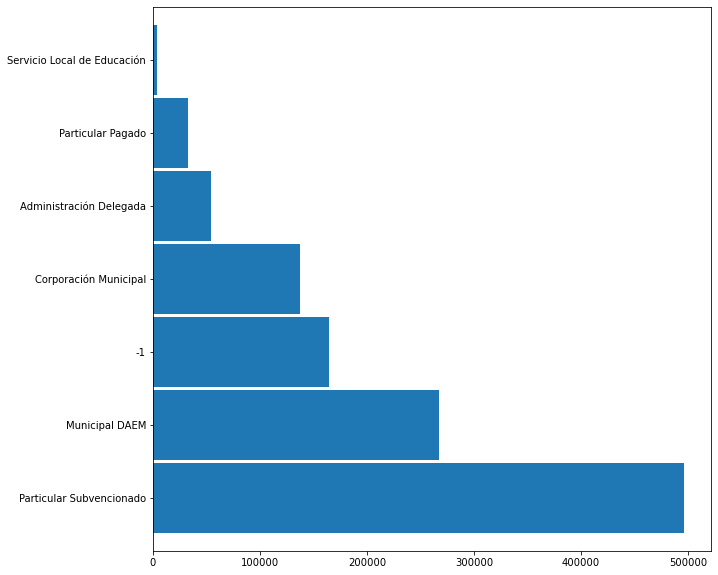

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
pd.value_counts(
    df.drop_duplicates(subset='mrun')['dependencia_colegio']
                ).T.plot(kind='barh',stacked=True,width=0.95,ax=ax)

<AxesSubplot:>

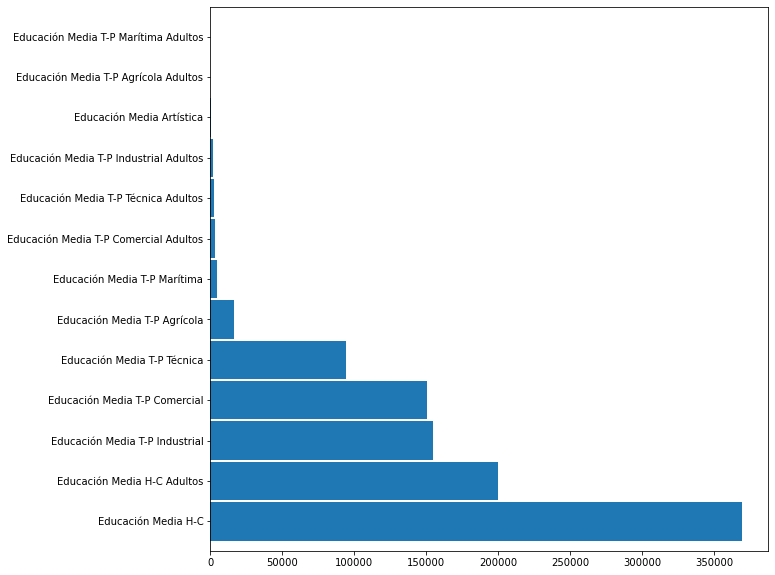

In [38]:
fig, ax = plt.subplots(figsize=(10, 10))
pd.value_counts(
    df.drop_duplicates(subset='mrun')['tipo_ensenanza_colegio']
                ).T.plot(kind='barh',stacked=True,width=0.95,ax=ax)

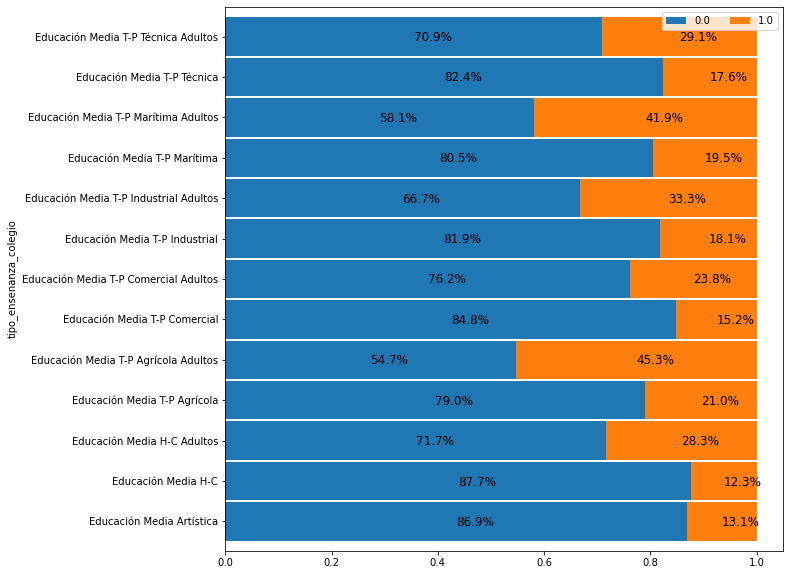

In [39]:
cross_tab_prop = pd.crosstab(index=df['tipo_ensenanza_colegio'],
                             columns=df['desertor_1'],
                             normalize="index")

cross_tab = pd.crosstab(index=df['tipo_ensenanza_colegio'],
                        columns=df['desertor_1'])


cross_tab_prop.plot(kind='barh', 
                        stacked=True,
                        width=0.95, 
                        figsize=(10, 10))

plt.legend(loc="best", ncol=2)

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12)

plt.show()

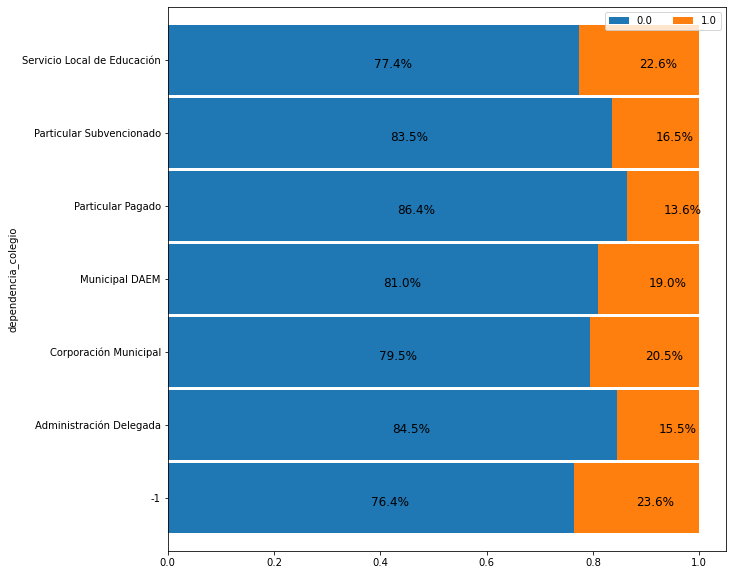

In [40]:
cross_tab_prop = pd.crosstab(index=df['dependencia_colegio'],
                             columns=df['desertor_1'],
                             normalize="index")

cross_tab = pd.crosstab(index=df['dependencia_colegio'],
                        columns=df['desertor_1'])


cross_tab_prop.plot(kind='barh', 
                        stacked=True,
                        width=0.95, 
                        figsize=(10, 10))

plt.legend(loc="best", ncol=2)

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,)

plt.show()

## VISUALIZACIONES 2
Visualizando la Deserción de los Estudiantes según Dependencia y Tipo de Enseñanza en menos Categorías

In [41]:
tipo_ensenanza_colegio_2 = {  0: "No Aplica",
                           10: "Educación Parvularia",
                          110: "Educación Básica",
                          160: "Educación Básica",
                          161: "Educación Básica",
                          163: "Escuelas Cárceles",
                          165: "Educación Básica",
                          167: "Educación Básica",
                          211: "Educación Especial",
                          212: "Educación Especial",
                          213: "Educación Especial",
                          214: "Educación Especial",
                          215: "Educación Especial",
                          216: "Educación Especial",
                          217: "Educación Especial",
                          299: "Opción 4 Programa Integración Escolar",
                          310: "Educación Media H-C",
                          360: "Educación Media H-C",
                          361: "Educación Media H-C",
                          362: "Escuelas Cárceles",
                          363: "Educación Media H-C",
                          410: "Educación Media T-P \n Comercial",
                          460: "Educación Media T-P \n Comercial",
                          461: "Educación Media T-P \n Comercial",
                          463: "Educación Media T-P \n Comercial",
                          510: "Educación Media T-P \n Industrial",
                          560: "Educación Media T-P \n Industrial",
                          561: "Educación Media T-P \n Industrial",
                          563: "Educación Media T-P \n Industrial",
                          610: "Educación Media T-P \n Técnica",
                          660: "Educación Media T-P \n Técnica",
                          661: "Educación Media T-P \n Técnica",
                          663: "Educación Media T-P \n Técnica",
                          710: "Otro",
                          760: "Otro",
                          761: "Otro",
                          763: "Otro",
                          810: "Otro",
                          860: "Otro",
                          863: "Otro",
                          910: "Otro",
                          963: "Otro"
                         }

In [42]:
df2 = df2.replace({'tipo_ensenanza_colegio': tipo_ensenanza_colegio_2})
df2

,cat_periodo,codigo_unico,mrun,anio_ing_carr_ori,tipo_inst_1,desertor_1,tipo_ensenanza_colegio,dependencia_colegio
0,2015,I498S6C132J2V1,37.0,2015,Centros de Formación Técnica,0.0,NaN,-1
1,2015,I111S14C309J2V1,118.0,2015,Institutos Profesionales,0.0,Educación Media H-C,3
2,2015,I106S3C64J4V1,253.0,2015,Institutos Profesionales,1.0,NaN,-1
3,2015,I221S1C57J1V1,370.0,2015,Centros de Formación Técnica,1.0,Educación Media H-C,3
4,2015,I176S8C59J2V1,533.0,2015,Institutos Profesionales,0.0,Educación Media T-P \n Industrial,2
...,...,...,...,...,...,...,...,...
2746649,2021,I106S6C295J4V1,26380151.0,2020,Institutos Profesionales,0.0,NaN,-1
2746650,2021,I260S44C120J1V1,26380152.0,2021,Centros de Formación Técnica,1.0,NaN,-1
2746651,2021,I152S10C341J4V1,26453499.0,2021,Institutos Profesionales,1.0,NaN,-1
2746652,2021,I152S10C349J4V1,26453942.0,2020,Institutos Profesionales,0.0,NaN,-1


In [43]:
dependencia_colegio_2 = {1: 'Municipal',
                       2: 'Municipal',
                       3: 'Particular \n Subvencionado',
                       4: 'Particular \n Pagado',
                       5: 'Otro',
                       6: 'Otro'}

In [44]:
df2 = df2.replace({'dependencia_colegio': dependencia_colegio_2})
df2

,cat_periodo,codigo_unico,mrun,anio_ing_carr_ori,tipo_inst_1,desertor_1,tipo_ensenanza_colegio,dependencia_colegio
0,2015,I498S6C132J2V1,37.0,2015,Centros de Formación Técnica,0.0,NaN,-1
1,2015,I111S14C309J2V1,118.0,2015,Institutos Profesionales,0.0,Educación Media H-C,Particular \n Subvencionado
2,2015,I106S3C64J4V1,253.0,2015,Institutos Profesionales,1.0,NaN,-1
3,2015,I221S1C57J1V1,370.0,2015,Centros de Formación Técnica,1.0,Educación Media H-C,Particular \n Subvencionado
4,2015,I176S8C59J2V1,533.0,2015,Institutos Profesionales,0.0,Educación Media T-P \n Industrial,Municipal
...,...,...,...,...,...,...,...,...
2746649,2021,I106S6C295J4V1,26380151.0,2020,Institutos Profesionales,0.0,NaN,-1
2746650,2021,I260S44C120J1V1,26380152.0,2021,Centros de Formación Técnica,1.0,NaN,-1
2746651,2021,I152S10C341J4V1,26453499.0,2021,Institutos Profesionales,1.0,NaN,-1
2746652,2021,I152S10C349J4V1,26453942.0,2020,Institutos Profesionales,0.0,NaN,-1


In [45]:
pd.value_counts(df2.drop_duplicates(subset='mrun')['dependencia_colegio'])

Particular \n Subvencionado    496429
Municipal                      405052
-1                             164245
Otro                            58537
Particular \n Pagado            32510
Name: dependencia_colegio, dtype: int64

In [46]:
100 * df2.drop_duplicates(subset='mrun')['dependencia_colegio'].value_counts() / len(df2.drop_duplicates(subset='mrun')['dependencia_colegio'])

Particular \n Subvencionado    42.914989
Municipal                      35.015686
-1                             14.198551
Otro                            5.060371
Particular \n Pagado            2.810404
Name: dependencia_colegio, dtype: float64

In [47]:
pd.value_counts(df2.drop_duplicates(subset='mrun')['tipo_ensenanza_colegio'])

Educación Media H-C                  568672
Educación Media T-P \n Industrial    156354
Educación Media T-P \n Comercial     153283
Educación Media T-P \n Técnica        96548
Otro                                  21330
Name: tipo_ensenanza_colegio, dtype: int64

In [48]:
100 * df2.drop_duplicates(subset='mrun')['tipo_ensenanza_colegio'].value_counts() / len(df2.drop_duplicates(subset='mrun')['tipo_ensenanza_colegio'])

Educación Media H-C                  49.160207
Educación Media T-P \n Industrial    13.516394
Educación Media T-P \n Comercial     13.250914
Educación Media T-P \n Técnica        8.346322
Otro                                  1.843923
Name: tipo_ensenanza_colegio, dtype: float64

In [49]:
# CANTIDAD DE DESERTORES POR TIPO DE ENSEÑANZA
pd.crosstab(index=df2.drop_duplicates(subset='mrun')['desertor_1'],
            columns=df2.drop_duplicates(subset='mrun')['tipo_ensenanza_colegio'], margins=True).T

desertor_1,0.0,1.0,All
tipo_ensenanza_colegio,,,
Educación Media H-C,466717,101955,568672
Educación Media T-P \n Comercial,129801,23482,153283
Educación Media T-P \n Industrial,127754,28600,156354
Educación Media T-P \n Técnica,79283,17265,96548
Otro,16901,4429,21330
All,820456,175731,996187


In [50]:
# FRECUENCIA DE DESERTORES POR CATEGORÍA DE TIPO DE ENSEÑANZA
pd.crosstab(index=df2.drop_duplicates(subset='mrun')['desertor_1'], 
            columns=df2.drop_duplicates(subset='mrun')['tipo_ensenanza_colegio']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0).T

desertor_1,0.0,1.0
tipo_ensenanza_colegio,,
Educación Media H-C,82.071387,17.928613
Educación Media T-P \n Comercial,84.680623,15.319377
Educación Media T-P \n Industrial,81.708175,18.291825
Educación Media T-P \n Técnica,82.117703,17.882297
Otro,79.235818,20.764182


In [51]:
# CANTIDAD DE DESERTORES POR TIPO DE DEPENDENCIA
pd.crosstab(index=df2.drop_duplicates(subset='mrun')['desertor_1'],
            columns=df2.drop_duplicates(subset='mrun')['dependencia_colegio'], margins=True).T

desertor_1,0.0,1.0,All
dependencia_colegio,,,
-1,125459,38786,164245
Municipal,325900,79152,405052
Otro,49214,9323,58537
Particular \n Pagado,28102,4408,32510
Particular \n Subvencionado,414475,81954,496429
All,943150,213623,1156773


In [52]:
mask = df2['dependencia_colegio'] != -1
df2 = df2[mask]

In [53]:
# FRECUENCIA DE DESERTORES POR CATEGORÍA DE TIPO DE DEPENDENCIA
mask = df2['dependencia_colegio'] != -1
pd.crosstab(index=df2[mask].drop_duplicates(subset='mrun')['desertor_1'], 
            columns=df2.drop_duplicates(subset='mrun')['dependencia_colegio']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0).T

desertor_1,0.0,1.0
dependencia_colegio,,
Municipal,80.458805,19.541195
Otro,84.073321,15.926679
Particular \n Pagado,86.441095,13.558905
Particular \n Subvencionado,83.491295,16.508705


<AxesSubplot:>

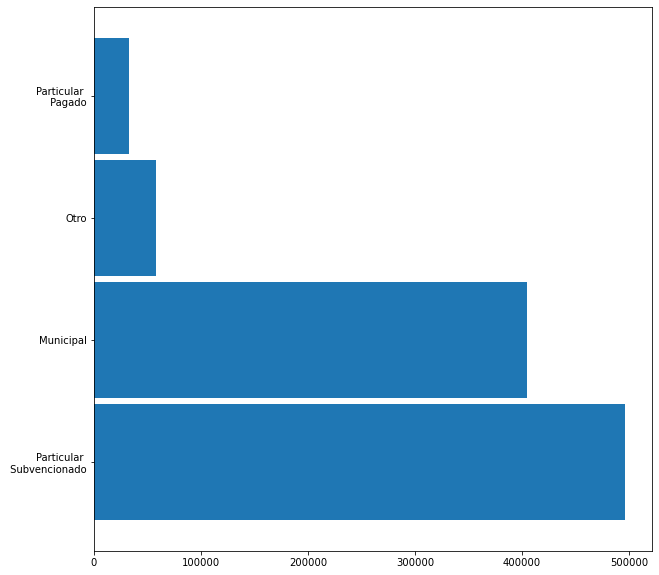

In [54]:
fig, ax = plt.subplots(figsize=(10, 10))
mask = df2['dependencia_colegio'] != -1
pd.value_counts(
    df2[mask].drop_duplicates(subset='mrun')['dependencia_colegio']
                ).T.plot(kind='barh',stacked=True,width=0.95,ax=ax)

<AxesSubplot:>

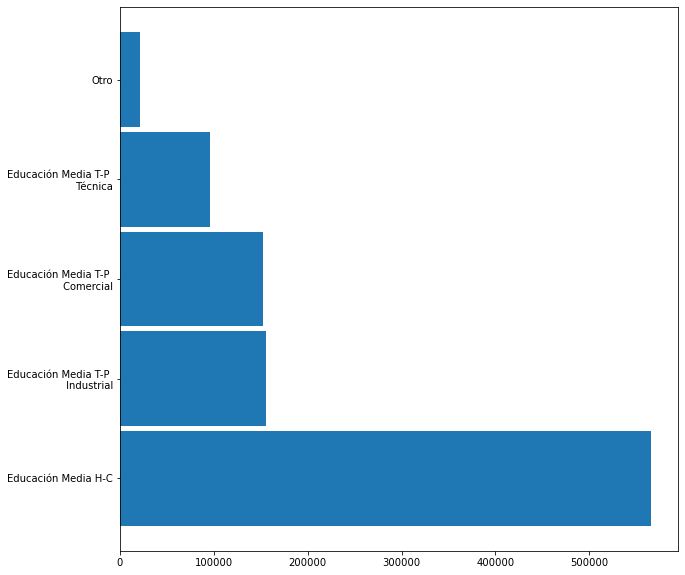

In [55]:
fig, ax = plt.subplots(figsize=(10, 10))
mask = df2['dependencia_colegio'] != -1
pd.value_counts(
    df2[mask].drop_duplicates(subset='mrun')['tipo_ensenanza_colegio']
                ).T.plot(kind='barh',stacked=True,width=0.95,ax=ax)

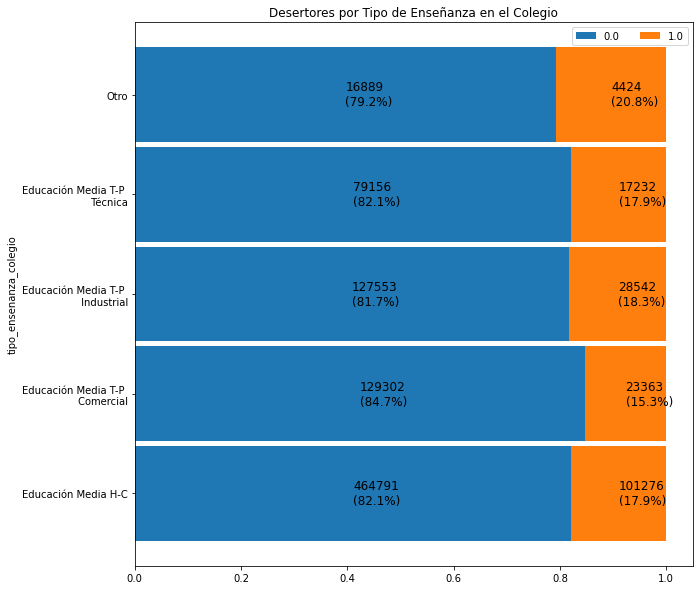

In [56]:
cross_tab_prop = pd.crosstab(index=df2['tipo_ensenanza_colegio'],
                             columns=df2['desertor_1'],
                             normalize="index")

cross_tab = pd.crosstab(index=df2['tipo_ensenanza_colegio'],
                        columns=df2['desertor_1'])


cross_tab_prop.plot(kind='barh', 
                        stacked=True,
                        width=0.95, 
                        figsize=(10, 10))

plt.legend(loc="best", ncol=2)
plt.title("Desertores por Tipo de Enseñanza en el Colegio")

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [57]:
mask = df2['cat_periodo']<2020
df2=df2[mask]

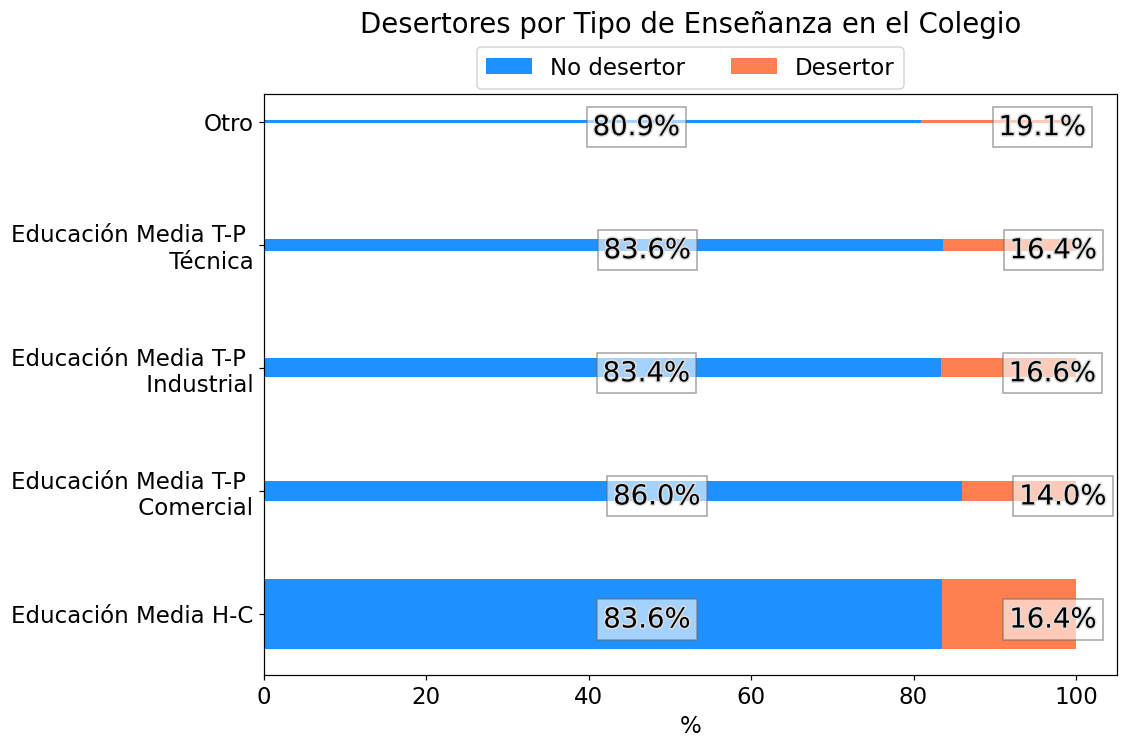

In [70]:
cross_tab_prop = pd.crosstab(index=df2['tipo_ensenanza_colegio'],
                             columns=df2['desertor_1'],
                             normalize="index")

cross_tab = pd.crosstab(index=df2['tipo_ensenanza_colegio'],
                        columns=df2['desertor_1'])


w = list(cross_tab.T.sum()/cross_tab.T.sum().sum())

f, ax = plt.subplots(figsize=(10,7), dpi=110)
plt.rcParams.update({'font.size': 15})

plt.title("Desertores por Tipo de Enseñanza en el Colegio", pad=40)

b1 = plt.barh(cross_tab_prop.reset_index()['tipo_ensenanza_colegio'],
                cross_tab_prop.reset_index()[0], 
                color="dodgerblue",
                height=w)

b2 = plt.barh(cross_tab_prop.reset_index()['tipo_ensenanza_colegio'],
                cross_tab_prop.reset_index()[1], 
                left=cross_tab_prop.reset_index()[0], 
                color="coral",
                height=w)
                
for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
                
        t = plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=18,
                path_effects=[pe.withStroke(linewidth=2, foreground="gainsboro")])
        t.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='dimgray'))

ax.legend(['No desertor', 'Desertor'],loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.1))
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticks(np.arange(0, 1.2, 0.2), [0, 20, 40, 60, 80, 100]);
ax.set_xlabel("%");

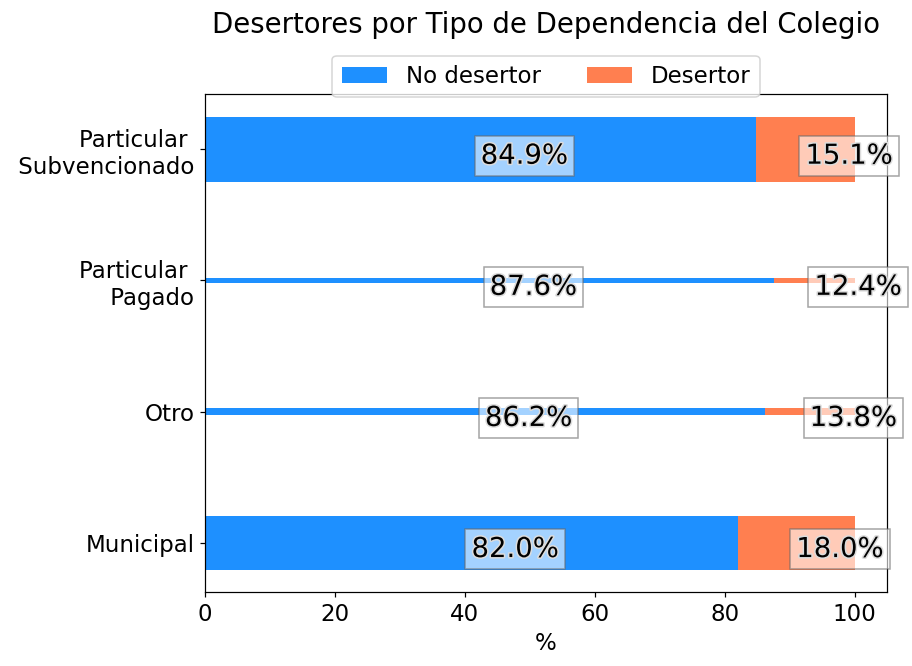

In [67]:
cross_tab_prop = pd.crosstab(index=df2['dependencia_colegio'],
                             columns=df2['desertor_1'],
                             normalize="index")

cross_tab = pd.crosstab(index=df2['dependencia_colegio'],
                        columns=df2['desertor_1'])


w = list(cross_tab.T.sum()/cross_tab.T.sum().sum())

f, ax = plt.subplots(figsize=(8,6), dpi=110)

plt.rcParams.update({'font.size': 15})

plt.title("Desertores por Tipo de Dependencia del Colegio", pad=40)

b1 = plt.barh(cross_tab_prop.reset_index()['dependencia_colegio'],
                cross_tab_prop.reset_index()[0], 
                color="dodgerblue",
                height=w)

b2 = plt.barh(cross_tab_prop.reset_index()['dependencia_colegio'],
                cross_tab_prop.reset_index()[1], 
                left=cross_tab_prop.reset_index()[0], 
                color="coral",
                height=w)

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
                
        t = plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=18,
                path_effects=[pe.withStroke(linewidth=2, foreground="gainsboro")])
        t.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='dimgray'))

ax.legend(['No desertor', 'Desertor'],loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.1))
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticks(np.arange(0, 1.2, 0.2), [0, 20, 40, 60, 80, 100]);
ax.set_xlabel("%");


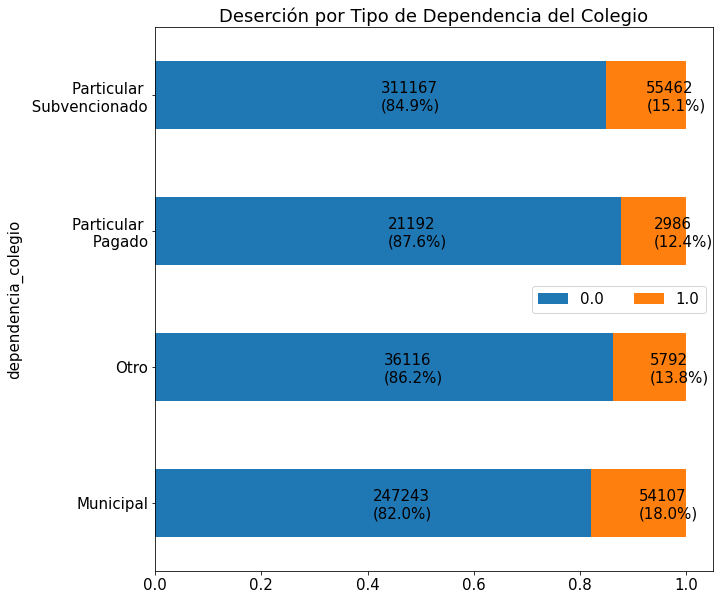

In [60]:
from turtle import width


cross_tab_prop = pd.crosstab(index=df2['dependencia_colegio'],
                             columns=df2['desertor_1'],
                             normalize="index")

cross_tab = pd.crosstab(index=df2['dependencia_colegio'],
                        columns=df2['desertor_1'])

cross_tab_prop.plot(kind='barh', 
                        stacked=True,
                        figsize=(10, 10))

plt.legend(loc="best", ncol=2)
plt.title("Deserción por Tipo de Dependencia del Colegio")

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=15)

plt.show()

## VISUALIZACIONES 3
Visualizando la Deserción de los Estudiantes según Dependencia y Tipo de Enseñanza a lo largo del tiempo.

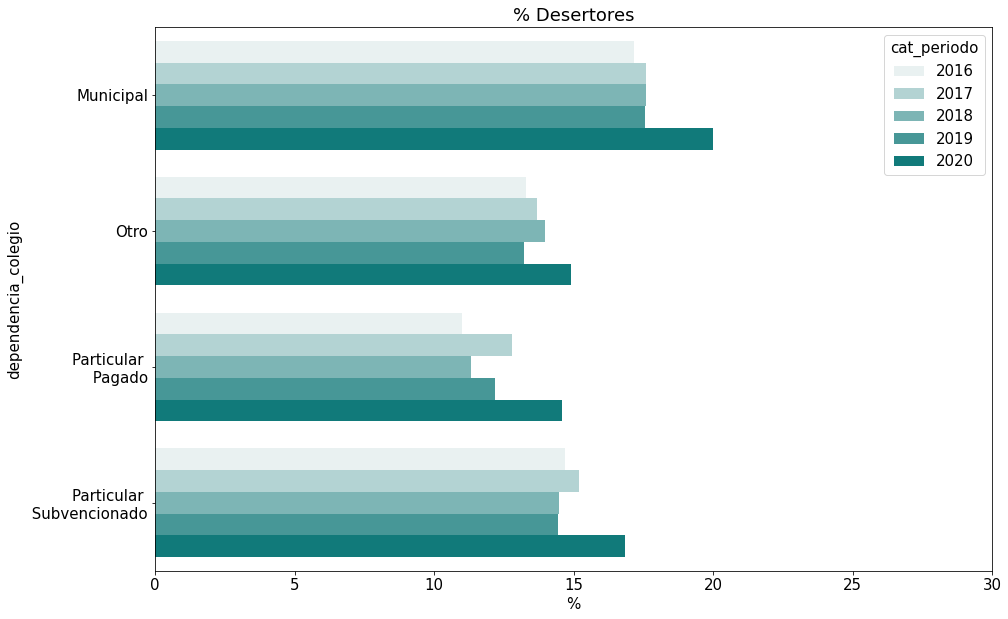

In [61]:
mask = df2['dependencia_colegio'] != -1
aux = df2[mask].groupby([
    "cat_periodo", "dependencia_colegio"
])["desertor_1"].value_counts("%").mul(100).rename('%').reset_index()

aux2 = aux[
    (aux["desertor_1"]==1) & (aux['cat_periodo']<2020)
].copy()
aux2["cat_periodo"] = aux2["cat_periodo"] + 1


plt.figure(figsize=(15, 10))
sns.barplot(
    data=aux2,
    y="dependencia_colegio",
    x="%",
    color="darkcyan",
    hue="cat_periodo"
)
plt.xlabel("%")
plt.xlim([0, 30])
plt.title("% Desertores");

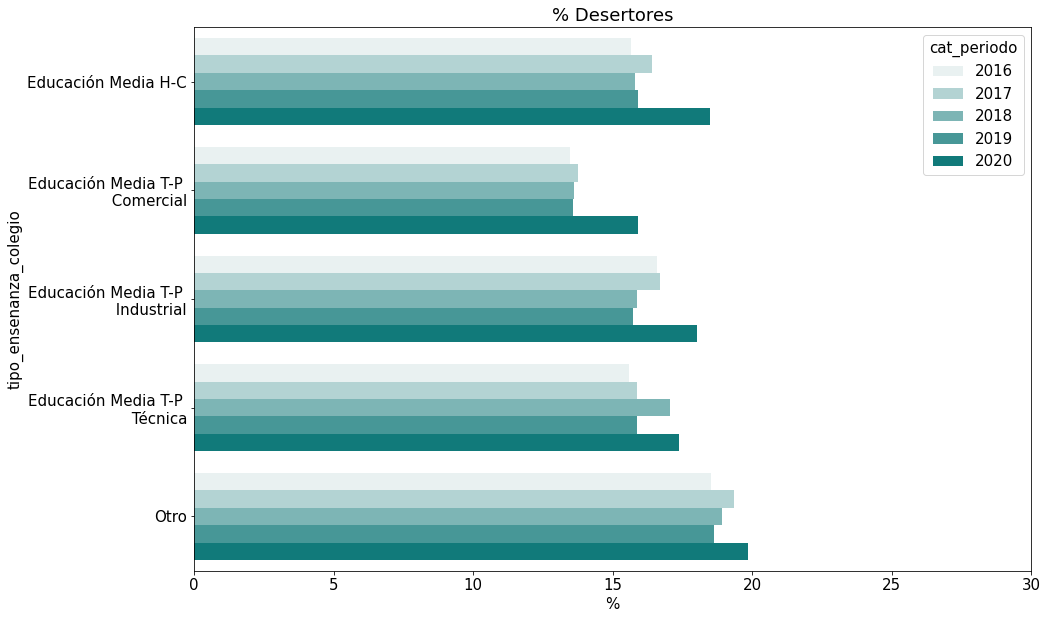

In [1740]:
mask = df2['dependencia_colegio'] != -1
aux = df2[mask].groupby([
    "cat_periodo", "tipo_ensenanza_colegio"
])["desertor_1"].value_counts("%").mul(100).rename('%').reset_index()



aux2 = aux[
    (aux["desertor_1"]==1) & (aux['cat_periodo']<2020)
].copy()
aux2["cat_periodo"] = aux2["cat_periodo"] + 1

plt.figure(figsize=(15, 10))
sns.barplot(
    data=aux2,
    y="tipo_ensenanza_colegio",
    x="%",
    color="darkcyan",
    hue="cat_periodo"
)
plt.xlabel("%")
plt.xlim([0, 30])
plt.title("% Desertores");

## MODELOS

### Dependencia Colegio

#### Formateo de Base de Datos

In [1741]:
df_logit = df2.copy()
df_logit = df_logit.drop_duplicates(subset='mrun')

In [1742]:
df_logit

,cat_periodo,codigo_unico,mrun,anio_ing_carr_ori,tipo_inst_1,desertor_1,tipo_ensenanza_colegio,dependencia_colegio
1,2015,I111S14C309J2V1,118.0,2015,Institutos Profesionales,0.0,Educación Media H-C,Particular \n Subvencionado
3,2015,I221S1C57J1V1,370.0,2015,Centros de Formación Técnica,1.0,Educación Media H-C,Particular \n Subvencionado
4,2015,I176S8C59J2V1,533.0,2015,Institutos Profesionales,0.0,Educación Media T-P \n Industrial,Municipal
5,2015,I111S9C89J1V1,598.0,2015,Institutos Profesionales,0.0,Educación Media T-P \n Comercial,Particular \n Subvencionado
6,2015,I498S5C155J1V2,630.0,2015,Centros de Formación Técnica,1.0,Educación Media T-P \n Industrial,Particular \n Subvencionado
...,...,...,...,...,...,...,...,...
1800721,2019,I143S15C30J1V1,25768671.0,2019,Institutos Profesionales,0.0,Educación Media H-C,Particular \n Subvencionado
1800722,2019,I143S29C26J2V1,25768749.0,2019,Institutos Profesionales,0.0,Educación Media H-C,Municipal
1800723,2019,I273S1C5J2V1,25768815.0,2019,Centros de Formación Técnica,0.0,Educación Media H-C,Particular \n Subvencionado
1800724,2019,I143S26C376J2V1,25768831.0,2019,Institutos Profesionales,1.0,Educación Media H-C,Particular \n Subvencionado


In [1743]:
df_logit.isna().sum()/df_logit.shape[0]

cat_periodo               0.0
codigo_unico              0.0
mrun                      0.0
anio_ing_carr_ori         0.0
tipo_inst_1               0.0
desertor_1                0.0
tipo_ensenanza_colegio    0.0
dependencia_colegio       0.0
dtype: float64

In [1744]:
df_logit=df_logit.dropna(subset=['desertor_1'])

In [1745]:
mask = df_logit['dependencia_colegio'] != -1
df_logit=df_logit[mask]

In [1746]:
df_logit = pd.get_dummies(df_logit,columns=['dependencia_colegio','desertor_1'],drop_first=True)

In [1747]:
df_logit

,cat_periodo,codigo_unico,mrun,anio_ing_carr_ori,tipo_inst_1,tipo_ensenanza_colegio,dependencia_colegio_Otro,dependencia_colegio_Particular \n Pagado,dependencia_colegio_Particular \n Subvencionado,desertor_1_1.0
1,2015,I111S14C309J2V1,118.0,2015,Institutos Profesionales,Educación Media H-C,0,0,1,0
3,2015,I221S1C57J1V1,370.0,2015,Centros de Formación Técnica,Educación Media H-C,0,0,1,1
4,2015,I176S8C59J2V1,533.0,2015,Institutos Profesionales,Educación Media T-P \n Industrial,0,0,0,0
5,2015,I111S9C89J1V1,598.0,2015,Institutos Profesionales,Educación Media T-P \n Comercial,0,0,1,0
6,2015,I498S5C155J1V2,630.0,2015,Centros de Formación Técnica,Educación Media T-P \n Industrial,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1800721,2019,I143S15C30J1V1,25768671.0,2019,Institutos Profesionales,Educación Media H-C,0,0,1,0
1800722,2019,I143S29C26J2V1,25768749.0,2019,Institutos Profesionales,Educación Media H-C,0,0,0,0
1800723,2019,I273S1C5J2V1,25768815.0,2019,Centros de Formación Técnica,Educación Media H-C,0,0,1,0
1800724,2019,I143S26C376J2V1,25768831.0,2019,Institutos Profesionales,Educación Media H-C,0,0,1,1


In [1748]:
#mask = df_logit['cat_periodo'] == 2017

#sample = df_logit[mask].sample(n=100000, random_state = 12345)
sample = df_logit.sample(n=10000, random_state = 12345)

X = sample.iloc[:,6:]
X=X.drop(columns='desertor_1_1.0')
y = sample['desertor_1_1.0']

In [1749]:
y.sum()

1644

#### Logistic Regression

In [1750]:
import statsmodels.api as sm

logit_model = sm.Logit(y, sm.add_constant(X)).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 350.452512
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         desertor_1_1.0   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Tue, 11 Oct 2022   Pseudo R-squ.:                     inf
Time:                        23:06:25   Log-Likelihood:            -3.5045e+06
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                             

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:3511: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [1751]:
! pip3 install mlxtend
from sklearn.metrics import confusion_matrix,precision_score, recall_score
from mlxtend.plotting import plot_confusion_matrix

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [1752]:
y_pred = logit_model.predict(sm.add_constant(X))
y_pred = np.round(y_pred)

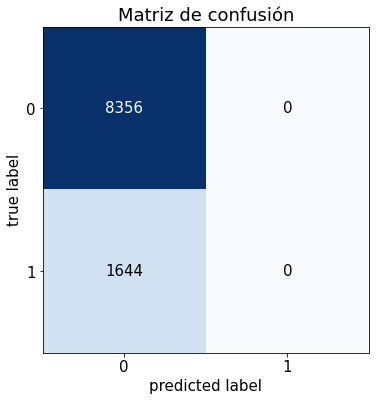

In [1753]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y,y_pred), figsize=(6,6))
plt.title('Matriz de confusión')
plt.show()

In [1754]:
print('precision = ', precision_score(y, y_pred))

precision =  0.0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Random Forest

In [1755]:
from sklearn.ensemble import RandomForestClassifier

In [1756]:
forest = RandomForestClassifier(random_state=12345)
forest.fit(X, y)

RandomForestClassifier(random_state=12345)

In [1757]:
bestfeatures = set()

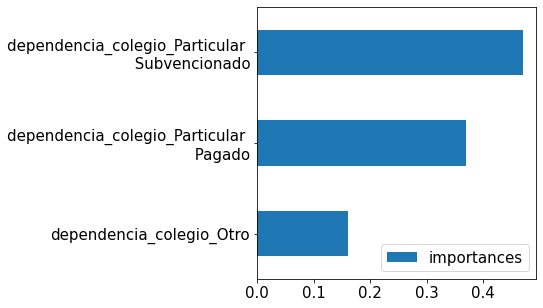

In [1758]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
imps = pd.DataFrame.from_dict({"importances": importances})
imps.index = list(X)
imps.sort_values(by="importances").plot.barh(figsize=(5, 5))
bestfeatures |= set(imps.sort_values(by="importances").iloc[-10:].index) # add best features

In [1759]:
y_pred = forest.predict(X)
y_pred = np.round(y_pred)

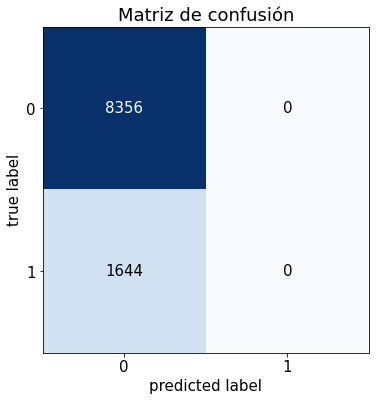

In [1760]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y,y_pred), figsize=(6,6))
plt.title('Matriz de confusión')
plt.show()

In [1761]:
print('precision = ', precision_score(y, y_pred))

precision =  0.0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Tipo de Enseñanza

#### Formateo de Base de Datos

In [1762]:
df_logit = df2.copy()
df_logit = df_logit.drop_duplicates(subset='mrun')

In [1763]:
mask = df_logit['dependencia_colegio'] != -1
df_logit=df_logit[mask]

In [1764]:
df_logit=df_logit.dropna(subset=['desertor_1'])

In [1765]:
df_logit.isna().sum()/df_logit.shape[0]

cat_periodo               0.0
codigo_unico              0.0
mrun                      0.0
anio_ing_carr_ori         0.0
tipo_inst_1               0.0
desertor_1                0.0
tipo_ensenanza_colegio    0.0
dependencia_colegio       0.0
dtype: float64

In [1766]:
df_logit['tipo_ensenanza_colegio'].unique()

array(['Educación Media H-C', 'Educación Media T-P \n Industrial',
       'Educación Media T-P \n Comercial',
       'Educación Media T-P \n Técnica', 'Otro'], dtype=object)

In [1767]:
df_logit = pd.get_dummies(df_logit,columns=['tipo_ensenanza_colegio','desertor_1'],drop_first=True)

In [1768]:
df_logit.head()

,cat_periodo,codigo_unico,mrun,anio_ing_carr_ori,tipo_inst_1,dependencia_colegio,tipo_ensenanza_colegio_Educación Media T-P \n Comercial,tipo_ensenanza_colegio_Educación Media T-P \n Industrial,tipo_ensenanza_colegio_Educación Media T-P \n Técnica,tipo_ensenanza_colegio_Otro,desertor_1_1.0
1,2015,I111S14C309J2V1,118.0,2015,Institutos Profesionales,Particular \n Subvencionado,0,0,0,0,0
3,2015,I221S1C57J1V1,370.0,2015,Centros de Formación Técnica,Particular \n Subvencionado,0,0,0,0,1
4,2015,I176S8C59J2V1,533.0,2015,Institutos Profesionales,Municipal,0,1,0,0,0
5,2015,I111S9C89J1V1,598.0,2015,Institutos Profesionales,Particular \n Subvencionado,1,0,0,0,0
6,2015,I498S5C155J1V2,630.0,2015,Centros de Formación Técnica,Particular \n Subvencionado,0,1,0,0,1


In [1769]:
#mask = df_logit['cat_periodo'] == 2017

#sample = df_logit[mask].sample(n=100000, random_state = 12345)
sample = df_logit.sample(n=10000, random_state = 12345)

X = sample.iloc[:,6:]
X=X.drop(columns='desertor_1_1.0')
y = sample['desertor_1_1.0']

In [1770]:
X

,tipo_ensenanza_colegio_Educación Media T-P \n Comercial,tipo_ensenanza_colegio_Educación Media T-P \n Industrial,tipo_ensenanza_colegio_Educación Media T-P \n Técnica,tipo_ensenanza_colegio_Otro
1526879,1,0,0,0
887741,0,0,0,0
949099,1,0,0,0
1764090,0,0,0,0
657309,0,0,0,0
...,...,...,...,...
144929,1,0,0,0
214195,0,0,0,0
965807,0,0,0,0
1296387,0,0,1,0


#### Logistic Regression

In [1771]:
import statsmodels.api as sm

logit_model = sm.Logit(y, sm.add_constant(X)).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 347.113486
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         desertor_1_1.0   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9995
Method:                           MLE   Df Model:                            4
Date:                Tue, 11 Oct 2022   Pseudo R-squ.:                     inf
Time:                        23:06:28   Log-Likelihood:            -3.4711e+06
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:3511: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [1772]:
from sklearn.metrics import confusion_matrix,precision_score
from mlxtend.plotting import plot_confusion_matrix

In [1773]:
y_pred = logit_model.predict(sm.add_constant(X))
y_pred = np.round(y_pred)

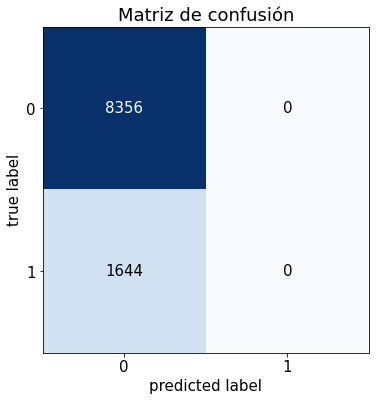

In [1774]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y,y_pred), figsize=(6,6))
plt.title('Matriz de confusión')
plt.show()

In [1775]:
print('precision = ', precision_score(y, y_pred))

precision =  0.0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Random Forest

In [1776]:
from sklearn.ensemble import RandomForestClassifier

In [1777]:
forest = RandomForestClassifier(random_state=12345)
forest.fit(X, y)

RandomForestClassifier(random_state=12345)

In [1778]:
bestfeatures = set()

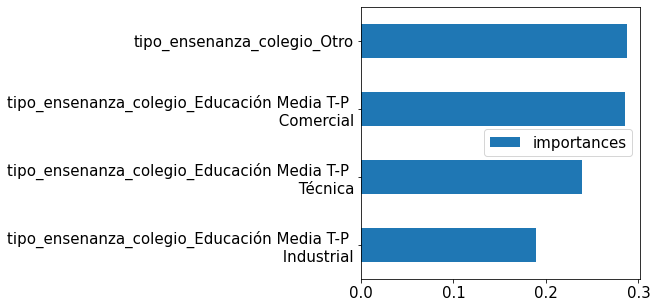

In [1779]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
imps = pd.DataFrame.from_dict({"importances": importances})
imps.index = list(X)
imps.sort_values(by="importances").plot.barh(figsize=(5, 5))
bestfeatures |= set(imps.sort_values(by="importances").iloc[-10:].index) # add best features

In [1780]:
y_pred = forest.predict(X)
y_pred = np.round(y_pred)

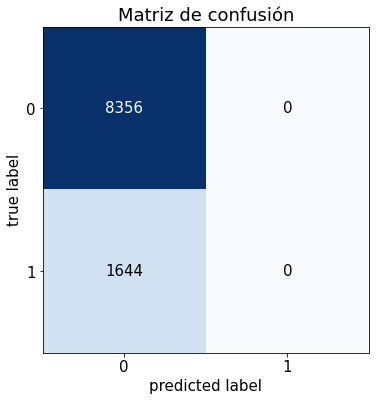

In [1781]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y,y_pred), figsize=(6,6))
plt.title('Matriz de confusión')
plt.show()

In [1782]:
print('precision = ', precision_score(y, y_pred))

precision =  0.0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Tipo de Enseñanza y Dependencia Colegio

#### Formateo de Base de Datos

In [1783]:
df_logit = df2.copy()
df_logit = df_logit.drop_duplicates(subset='mrun')

In [1784]:
mask = df_logit['dependencia_colegio'] != -1
df_logit=df_logit[mask]

In [1785]:
df_logit=df_logit.dropna(subset=['desertor_1'])

In [1786]:
df_logit.isna().sum()/df_logit.shape[0]

cat_periodo               0.0
codigo_unico              0.0
mrun                      0.0
anio_ing_carr_ori         0.0
tipo_inst_1               0.0
desertor_1                0.0
tipo_ensenanza_colegio    0.0
dependencia_colegio       0.0
dtype: float64

In [1787]:
df_logit['tipo_ensenanza_colegio'].unique()

array(['Educación Media H-C', 'Educación Media T-P \n Industrial',
       'Educación Media T-P \n Comercial',
       'Educación Media T-P \n Técnica', 'Otro'], dtype=object)

In [1788]:
df_logit = pd.get_dummies(df_logit,columns=['tipo_ensenanza_colegio','dependencia_colegio','desertor_1'],drop_first=True)

In [1789]:
df_logit.head()

,cat_periodo,codigo_unico,mrun,anio_ing_carr_ori,tipo_inst_1,tipo_ensenanza_colegio_Educación Media T-P \n Comercial,tipo_ensenanza_colegio_Educación Media T-P \n Industrial,tipo_ensenanza_colegio_Educación Media T-P \n Técnica,tipo_ensenanza_colegio_Otro,dependencia_colegio_Otro,dependencia_colegio_Particular \n Pagado,dependencia_colegio_Particular \n Subvencionado,desertor_1_1.0
1,2015,I111S14C309J2V1,118.0,2015,Institutos Profesionales,0,0,0,0,0,0,1,0
3,2015,I221S1C57J1V1,370.0,2015,Centros de Formación Técnica,0,0,0,0,0,0,1,1
4,2015,I176S8C59J2V1,533.0,2015,Institutos Profesionales,0,1,0,0,0,0,0,0
5,2015,I111S9C89J1V1,598.0,2015,Institutos Profesionales,1,0,0,0,0,0,1,0
6,2015,I498S5C155J1V2,630.0,2015,Centros de Formación Técnica,0,1,0,0,0,0,1,1


In [1790]:
#mask = df_logit['cat_periodo'] == 2021

#sample = df_logit[mask].sample(n=10000, random_state = 12345)
sample = df_logit.sample(n=10000, random_state = 12345)

X = sample.iloc[:,5:]
X=X.drop(columns='desertor_1_1.0')
y = sample['desertor_1_1.0']

#### Logistic Regression

In [1791]:
import statsmodels.api as sm

logit_model = sm.Logit(y, sm.add_constant(X)).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 350.849864
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         desertor_1_1.0   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Tue, 11 Oct 2022   Pseudo R-squ.:                     inf
Time:                        23:06:30   Log-Likelihood:            -3.5085e+06
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:3511: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [1792]:
from sklearn.metrics import confusion_matrix,precision_score
from mlxtend.plotting import plot_confusion_matrix

In [1793]:
y_pred = logit_model.predict(sm.add_constant(X))
y_pred = np.round(y_pred)

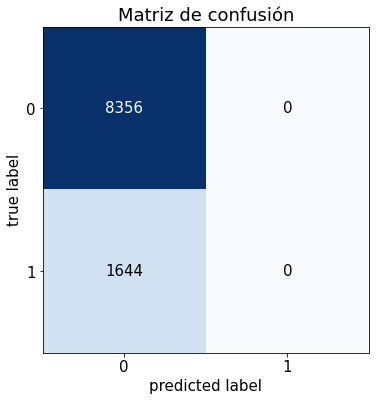

In [1794]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y,y_pred), figsize=(6,6))
plt.title('Matriz de confusión')
plt.show()

In [1795]:
print('precision = ', precision_score(y, y_pred))

precision =  0.0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Random Forest

In [1796]:
from sklearn.ensemble import RandomForestClassifier

In [1797]:
forest = RandomForestClassifier(random_state=12345)
forest.fit(X, y)

RandomForestClassifier(random_state=12345)

In [1798]:
bestfeatures = set()

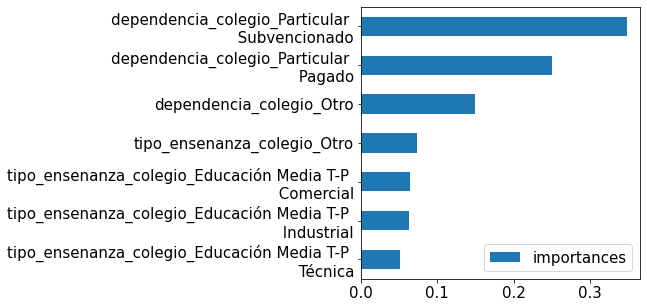

In [1799]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
imps = pd.DataFrame.from_dict({"importances": importances})
imps.index = list(X)
imps.sort_values(by="importances").plot.barh(figsize=(5, 5))
bestfeatures |= set(imps.sort_values(by="importances").iloc[-10:].index) # add best features

In [1800]:
y_pred = forest.predict(X)
y_pred = np.round(y_pred)

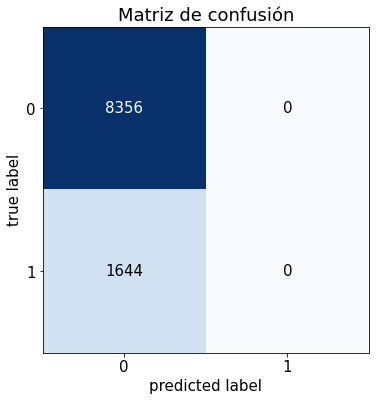

In [1801]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y,y_pred), figsize=(6,6))
plt.title('Matriz de confusión')
plt.show()

In [1802]:
print('precision = ', precision_score(y, y_pred))

precision =  0.0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
